In [28]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl
import scipy.optimize as opt
import scipy.interpolate as inter
import math


dataframe1=pd.read_csv("data/trail9-5.4mm.csv",header=None)
dataframe2=pd.read_csv("data/trail7-5mm.csv",header=None)
dataframe3=pd.read_csv("data/trail6-3.7mm.csv",header=None)

dataframe123=[dataframe1,dataframe3,dataframe2]
new=[]
for dataframe in dataframe123:
    dataframe[1]= dataframe[1].map(lambda x : int(x.strip("b").strip("'")))
    dataframe[0]= dataframe[0].map(lambda x : int(x.strip("b").strip("'")))
    new.append(dataframe.rename(columns={0:"?",1:"count",2:"distance"}))
dataframe123=new


In [3]:
dataframe4=pd.read_csv("data/counttrial1.csv",header=None)

dataframe4[1]= dataframe4[1].map(lambda x : int(x.strip("b").strip("'")))
dataframe4[0]= dataframe4[0].map(lambda x : int(x.strip("b").strip("\\r").strip("'").strip("\\").strip("r")))
dataframe4=dataframe4.rename(columns={0:"?",1:"count",2:"distance"})
dataframe4


,?,count,distance
0,168,337,0
1,169,339,1
2,170,316,2
3,171,301,3
4,172,321,4
...,...,...,...
6015,6183,320,6015
6016,6184,326,6016
6017,6185,307,6017
6018,6186,317,6018


In [4]:
counts = dataframe4['count']


In [5]:
def gaussian(x, mean, std, A):
    return A * np.exp(-(x-mean)**2/(2*std**2)) #equation of a Gaussian function to be used for fitting

329.0 329.61478405315614
19.16380553442714 18.798233792165348
[329.62937434  18.79823379 380.81048614]
[ 0.0352087   0.03520872 10.83662327]


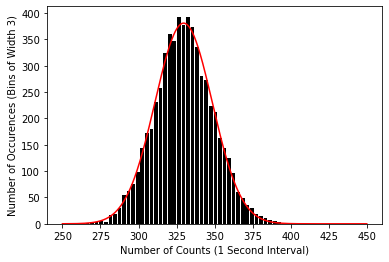

In [6]:
bin5 = np.arange(250, 450, 3)
#print(np.min(counts), np.max(counts), bin5)
print(np.median(counts), np.mean(counts))
y = plt.hist(counts, bins=bin5, rwidth=0.8, color='k')[0]
x = bin5[0:-1] + 1.5 #center of each bin
mean = np.mean(counts)
std = np.std(counts)
p,c = opt.curve_fit(gaussian, x, y, p0=(mean, std, 1))
X = np.linspace(250, 450, 100000)
plt.plot(X, gaussian(X, *p), color='r')

plt.xlabel('Number of Counts (1 Second Interval)')
plt.ylabel('Number of Occurences (Bins of Width 3)')
print(std, p[1])
print(p)
print(np.diag(c))
#plt.savefig('Poisson Distribution', dpi=300)

In [7]:
def double(x, A, a, lam, psi, psi2, b):
    alpha = np.pi * a/ lam * (x+psi)
    beta = np.pi * 0.45 / lam * (x+psi2)
    return A * np.cos(beta)**2 * (np.sin(alpha) / x)**2 + b #equation of double slit interference pattern

def single(x, A, a,lam, psi, b):
    return A/4 * (np.sin(np.pi*a*(x+psi)/lam) / x)**2 + b

def single2(x, A, a,lam, psi, b):
    return A/4 * (np.sin(np.pi*a*(x+psi)) / x)**2 + b

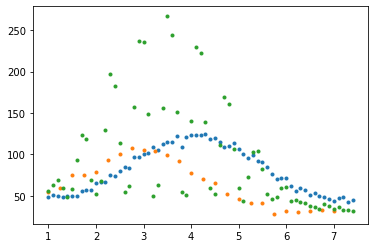

In [8]:
dataframe=dataframe123[0]
dfarray = dataframe.to_numpy().T
distance1 = np.arange(dataframe.min()["distance"], dataframe.max()["distance"],.1)
index=np.arange(0,len(dfarray[1])//10)
res1 = []
std1=[]
for i in index:
    res1.append(np.mean(dfarray[1, i*10:i*10+9]))
    
    std1.append(np.std(dfarray[1, i*10:i*10+9]))
plt.plot(distance1, res1, ".")
dataframe=dataframe123[1]
dfarray = dataframe.to_numpy().T
distance2 = np.arange(dataframe.min()["distance"], dataframe.max()["distance"],.25)
index=np.arange(0,len(dfarray[1])//10)
res2 = []
std2=[]
for i in index:
    res2.append(np.mean(dfarray[1, i*10:i*10+9]))
    
    std2.append(np.std(dfarray[1, i*10:i*10+9]))
plt.plot(distance2, res2, ".")
dataframe=dataframe123[2]
dfarray = dataframe.to_numpy().T
distance3 = np.arange(dataframe.min()["distance"], dataframe.max()["distance"],.1)
index=np.arange(0,len(dfarray[1])//10)
res3 = []
std3=[]
for i in index:
    res3.append(np.mean(dfarray[1, i*10:i*10+9]))
    
    std3.append(np.std(dfarray[1, i*10:i*10+9]))
plt.plot(distance3, res3, ".")


In [9]:
dataframe=dataframe123[0]
dfarray = dataframe.to_numpy().T
std3/np.sqrt(10)

array([1.19049735, 2.61524495, 2.38254973, 2.25968423, 1.88561808,
       2.19651801, 1.93856253, 4.05547945, 3.7725454 , 3.5143445 ,
       2.25311855, 2.51661148, 3.89237939, 3.52276547, 4.03350168,
       1.91485422, 1.96135504, 2.75277638, 4.55826478, 4.82687947,
       5.19068491, 5.29103598, 2.41343974, 1.93282241, 3.267498  ,
       5.08762721, 6.33294346, 2.81705564, 1.38064218, 1.84858972,
       4.27510739, 3.56145344, 5.95186453, 4.11441309, 1.40721246,
       0.8089011 , 4.27164062, 4.67618078, 1.8862727 , 3.93778781,
       2.70710086, 1.74483364, 1.94935887, 2.97686553, 1.32030674,
       3.1142841 , 2.60768096, 2.06618871, 1.73845397, 2.12974235,
       3.87521405, 2.29223057, 1.34164079, 2.19089023, 1.3984118 ,
       2.43938871, 1.67184381, 1.85658654, 2.40729344, 2.44494944,
       1.80191942, 0.8089011 , 2.00616334, 1.4832397 , 1.8365292 ])

In [10]:
dataframe=dataframe123[0]
dfarray = dataframe.to_numpy().T
distance1 = np.arange(dataframe.min()["distance"], dataframe.max()["distance"],.1)
index=np.arange(0,len(dfarray[1])//10)
res1 = []
for i in index:
    res1.append(np.mean(dfarray[1, 10*i:10*i+9]))
index

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64])

C:\Users\ROBINJ~1\AppData\Local\Temp/ipykernel_6228/2217765386.py:4: RuntimeWarning: divide by zero encountered in divide
  return A * np.cos(beta)**2 * (np.sin(alpha) / x)**2 + b #equation of double slit interference pattern
c:\users\robin james\appdata\local\programs\python\python39\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\ROBINJ~1\AppData\Local\Temp/ipykernel_6228/2217765386.py:10: RuntimeWarning: divide by zero encountered in divide
  return A/4 * (np.sin(np.pi*a*(x+psi)) / x)**2 + b
c:\users\robin james\appdata\local\programs\python\python39\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\ROBINJ~1\AppData\Local\Temp/ipykernel_6228/2217765386.py:10: RuntimeWarning: divide by zero 

array([ 3.04286120e+03,  4.58980922e-02,  2.74624143e-01, -1.17228313e+00,
       -4.93835687e-01,  4.05605760e+01])

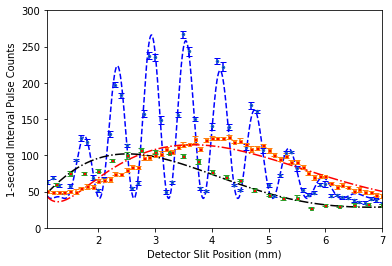

In [11]:
X = np.linspace(0, 8.1, 10000)
plt.errorbar(distance3, res3, yerr=std3/np.sqrt(10), ls='', capsize=3, marker='.', markerfacecolor='b', ecolor='b', markersize=5, label='Both Slits Open')
p2 = opt.curve_fit(double, distance3, res3,sigma=std3/np.sqrt(10),p0=[300,.01,.3,1,.01,49],maxfev=10000)[0]
plt.plot(X, double(X, *p2), 'b--')

plt.errorbar(distance1, res1, yerr=std1/np.sqrt(10), ls='', capsize=3, marker='s', markerfacecolor='r', markersize=3, label='Far Slit Open')
p3 = opt.curve_fit(single2, distance1, res1,sigma=std1/np.sqrt(10),p0=[300,.01,.3,1,49])[0]
plt.plot(X, single2(X, *p3), 'r-.')


plt.errorbar(distance2, res2, yerr=std2/np.sqrt(10), ls='', capsize=3, marker='s', markerfacecolor='r', markersize=3, label='Far Slit Open')
p4 = opt.curve_fit(single2, distance2, res2,sigma=std2/np.sqrt(10),p0=[300,.01,.3,1,49])[0]
plt.plot(X, single2(X, *p4), 'k-.')

plt.xlabel('Detector Slit Position (mm)')
plt.ylabel('1-second Interval Pulse Counts')



plt.xlim(1.1,7)
plt.ylim(0,300)
p2

In [13]:
interval_data = pd.read_csv(r"data/timetrial1.csv",header=None)

In [14]:

interval_data[1]= interval_data[1].map(lambda x : int(x.strip("b").strip("'")))
interval_data[0]= interval_data[0].map(lambda x : int(x.strip("b").strip("\\r").strip("'").strip("\\").strip("r")))
interval_data=interval_data.rename(columns={0:"?",1:"Interval time (ms)",2:"distance"})


In [15]:
interval = interval_data['Interval time (ms)']

In [16]:
def decay(t, lam, A):
    return A*np.exp(-lam*t)

[  49.84916375 9859.93397201] [5.18779272e-02 1.11712847e+03]
20344.954165268347 20571.759602625334
1317.9259676927259


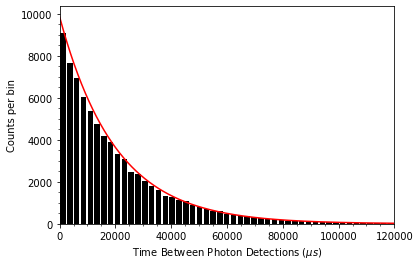

In [17]:
bins=100

plt.hist(interval, bins=bins, color='k', rwidth = 0.8)
y = plt.hist(interval, bins=bins, rwidth=0.8)[0]
x = (plt.hist(interval, bins=bins, rwidth=0.8)[1][0:-1] + 2160.4725) * 10**-6
p, c = opt.curve_fit(decay, x, y)

XX = np.linspace(0, 150000, 100000)

plt.hist(interval, bins=bins, color='k', rwidth = 0.8)
plt.plot(XX, decay(XX*10**-6, *p), 'r')
plt.xlim(0, 120000)
plt.xlabel('Time Between Photon Detections ($\mu s$)')
plt.ylabel('Counts per bin');
plt.minorticks_on()
print(p, np.diag(c))
print(np.mean(interval), np.std(interval))
print(np.mean(decay(XX*10**-6, *p)))

In [87]:
def double(x, A, a, lam, psi, b):
    alpha = np.pi * a/ lam * (x+psi)
    beta = np.pi * 0.45 / lam * (x+psi)
    return A * np.cos(beta)**2 * (np.sin(alpha) / x)**2 + b #equation of double slit interference pattern

x=np.arange(0.2,10.6,.2)
X=np.arange(0.01,10.6,.01)
y=np.array([0.054,0.009,0.026,0.059,0.025,0.010,0.013,0.009,0.025,0.036,0.037,0.067,0.078,0.177,0.321,0.208,0.169,0.697,0.789,0.239,0.477,1.513,1.046,0.152,1.248,2.064,0.731,0.310,1.960,1.762,0.209,0.761,2.013,1.003,0.055,0.961,1.242,0.279,0.183,0.647,0.429,0.077,0.132,0.075,0.201,0.344,0.381,0.432,0.562,0.640,0.671,0.706])

array([-4.448202  ,  0.04253317,  0.25335576,  5.91663085,  0.71300264])

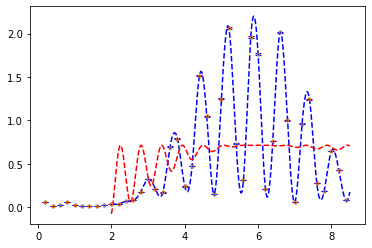

In [89]:
tump=-10
plt.plot(x[0:tump],y[0:tump],'.')
X = np.linspace(2, 8.5, 100000)
spline= inter.InterpolatedUnivariateSpline(x[0:tump],y[0:tump])
plt.errorbar(x[0:tump], y[0:tump], yerr=y[0:tump]*0.005, ls='', capsize=3, marker='.', markerfacecolor='b', ecolor='b', markersize=5, label='Both Slits Open')
p2 = opt.curve_fit(double,x[0:tump],y[0:tump],p0=[ 30,  .4e-1,  2.74624143e-01,
                                             6, 0],maxfev=100000)[0]
plt.plot(X, spline(X), 'b--')
plt.plot(X, double(X,*p2), 'r--')
#plt.ylim(0,2.5)
p2